         Date        Open        High         Low       Close   Adj Close    Volume
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  11896100
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001  12595800
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   8981500
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   9306700
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001  16906900

 Data Size =  (1009, 7)
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.01

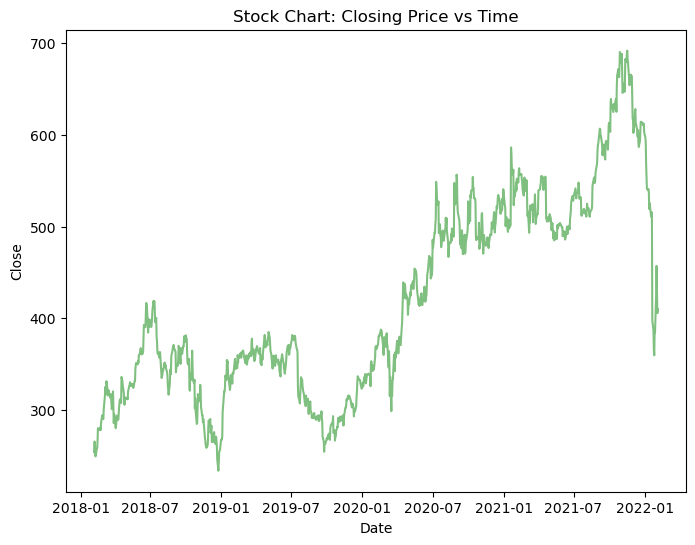

        Date        Open        High         Low       Close   Adj Close    Volume
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  11896100
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001  12595800
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   8981500
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   9306700
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001  16906900

 DATA ENCODING

 PERFORMANCE EVALUATIONS
R-squared =  0.9985986754051983
MSE =  15.681925454207288


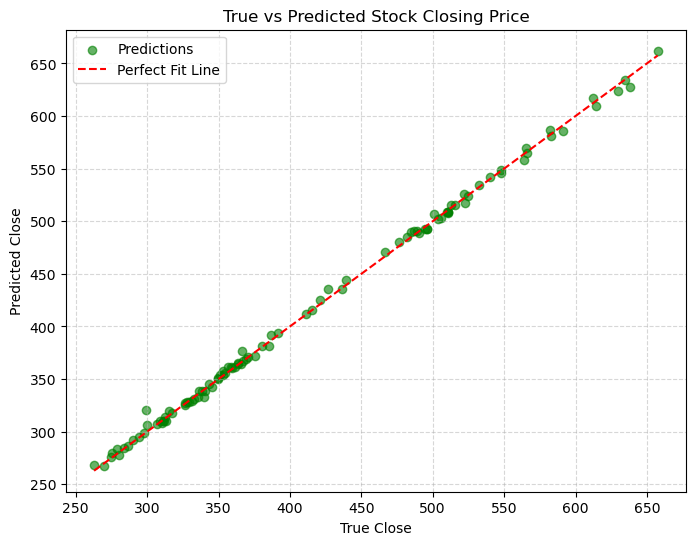

PREDICT NEW INSTANCES


Would you like to enter new prompts manually(0) or automatically via files(non-zero number)? 5


Place a file titled 'stockBatch.csv' in the program's file location.
...Waiting for new batch file...
...Waiting for new batch file...

 New batch detected! Predicting...
   Year  Month  Day        Open        High         Low    Volume  \
0  2018      7   13  409.190002  410.000000  395.079987  15719000   
1  2018      7   16  398.980011  403.359985  391.750000  22960000   
2  2018      7   17  346.950012  385.000000  344.000000  58410400   
3  2018      7   18  381.239990  383.130005  372.359985  21746300   
4  2018      7   19  371.059998  375.750000  363.000000  16878700   
5  2018      7   20  364.920013  370.500000  360.140015  15096700   
6  2018      7   23  359.149994  363.899994  353.600006  11505200   
7  2018      7   24  366.940002  367.399994  354.559998  12851500   
8  2018      7   25  357.570007  363.279999  355.649994   8467800   

   Predicted_close  
0       399.007861  
1       398.037534  
2       380.041830  
3       376.894979  
4       369.114254  
5       366.

If you have the known close prices would you like to see the system's accuracy?('Yes' or 'No') Yes


R-squared =  0.9546177354406383
MSE =  10.065658842767247

 Predictions done. File 'stockBatch.csv' deleted.
...Waiting for new batch file...
...Waiting for new batch file...
...Waiting for new batch file...


Would you like to continue?('Yes' or 'No') Yes



Error processing dates. Please ensure they're formatted as 'YYYY-MM-DD': time data "13-07-2018" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

File 'stockBatch.csv' deleted.
...Waiting for new batch file...
...Waiting for new batch file...
...Waiting for new batch file...

 Exiting real-time prediction mode.


In [59]:
"""
Learning Agent using Multi-Linear Regression. Predicts stock prices and allows user choice of manual or automatic entries via files.

Created on 13th Oct 2025

@author: V_Morgan
"""
import os
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()

class LearningAgent_MLR:
    
    def load_data(self, file_path):
        
        df = pd.read_csv(file_path)
        self.df = df
        
        print(df.head().to_string(index=True))
        
        print('\n Data Size = ', df.shape)
        
        print(df.describe())
        
        
    def visualizeData_bef_modeling(self):   
        print('\n VISUALIZE DATA PATTERNS BEFORE MODELING')
        df = self.df

        #converting date to date time to be truncated and processed properly
        df['Date'] = pd.to_datetime(df['Date'])
        
        x = df['Date']
        y = df['Close']

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.plot(x, y, color='green', alpha=0.5)
        plt.xlabel('Date')
        plt.ylabel('Close')
        plt.title('Stock Chart: Closing Price vs Time')
        plt.show()        
        
    def data_preprocessing(self):
        df = self.df                
        print(df.head().to_string(index=True))

        print('\n DATA ENCODING')

        #Separating Date rather than encoding it so the model can interpret it properly
        df['Date'] = pd.to_datetime(df['Date'])
        
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day

        features = df[['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]
        target = df['Close']
        
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        self.scaler = scaler
        
        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test    
        
        
    def train_agent_predict_test(self):   
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        
        MLR_agent = LinearRegression()  
        MLR_agent.fit(X_train, y_train)
        self.MLR_agent = MLR_agent
                
        self.pred = MLR_agent.predict(X_test)                
        self.MLR_agent = MLR_agent
        
        
    def evaluate_MLR_agent(self):     
        print('\n PERFORMANCE EVALUATIONS')
        X_test = self.X_test
        y_test = self.y_test  
        pred_y = self.pred
        
        r2 = r2_score(y_test, pred_y)
        print("R-squared = ", r2)
        
        mse = mean_squared_error(y_test, pred_y)
        print("MSE = ", mse)                     
        
        # Visualize the predictions        
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, pred_y, alpha=0.6, color='green', label='Predictions')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit Line')
        plt.xlabel("True Close")
        plt.ylabel("Predicted Close")
        plt.title("True vs Predicted Stock Closing Price")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

    def predict_new_percept(self, Date, Open, High, Low, Volume):              

        input_data = {'Year': Date.year,
                      'Month': Date.month,
                      'Day': Date.day,
                      'Open': Open,
                      'High': High,
                      'Low': Low,
                      'Volume': Volume,
        }

        new_input = pd.DataFrame([input_data])
        
        # Scale and predict
        new_scaled = self.scaler.transform(new_input)
        new_pred = self.MLR_agent.predict(new_scaled)                    
        
        print('\n Predicted Close Price = $', new_pred[0])

    #Function to handle new files that enter the AI's environment
    def predict_from_environment(self, batch_file):        
        if not os.path.exists(batch_file):
            return False  
        
        df_new = pd.read_csv(batch_file)

        #Checking if provided file has properly formatted dates
        try:
            df_new['Date'] = pd.to_datetime(df_new['Date'], format = "%Y-%m-%d")
            df_new['Year'] = df_new['Date'].dt.year
            df_new['Month'] = df_new['Date'].dt.month
            df_new['Day'] = df_new['Date'].dt.day
        except Exception as e:
            print(f"\nError processing dates. Please ensure they're formatted as 'YYYY-MM-DD': {e}")
            os.remove(batch_file)
            print(f"\nFile '{batch_file}' deleted.") 
            return True            
            
        if df_new.empty:
            print("The file you provided was empty. Please try another file.")
            return True  
        
        print("\n New batch detected! Predicting...")        
        features_new = df_new[['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]
        
        new_scaled = self.scaler.transform(features_new)
        predictions = self.MLR_agent.predict(new_scaled)
        
        df_new['Predicted_close'] = predictions
        print(df_new[['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume', 'Predicted_close']])

        #Allowing user to see accuracy of predictions comapred to actual closing prices. Only works if provided file has closing prices.
        while True:
            choice = input("If you have the known close prices would you like to see the system's accuracy?('Yes' or 'No')").strip().lower()
            if choice in {'yes', 'no'}:
                break
            else:
                print("Response not recognized. Please enter 'Yes' or 'No'")
                
        if choice == "yes":
            if 'Close' in df_new.columns:
                y_true = df_new['Close']
                r2 = r2_score(y_true, predictions)
                print("R-squared = ", r2)
            
                mse = mean_squared_error(y_true, predictions)
                print("MSE = ", mse)                    
            else:
                print("The file you provided did not have the closing values. Please supply a file with all values.")
        
        # Delete batch file after prediction
        os.remove(batch_file)
        print(f"\n Predictions done. File '{batch_file}' deleted.")   
        
    #Function to take in and handle categorical inputs from the user
    def cat_input(self, prompt, column_name, transform=None):
        #creates a list of acceptable inputs from the user
        valid_values = list(self.df[column_name].unique())

        #Requests input from the user until they enter a valid input
        while True:
            value = input(prompt).strip().lower()
            #transforms the users input to match the data style. All caps, upper case, etc.
            if transform:
                value = transform(value)
            if value in valid_values:
                return value
            else:
                print(f"'{value}' not recognized. Valid options include: {valid_values[:2]} ...")
                    
def collect_int(prompt):
    while True:
            try:
                return float(input(prompt))
            except ValueError:
                print("Please input an integer or float")

#Function to collect date for manual entries. Ensures prope
def collect_date():
    while True:
        date = input("Enter the date (YYYY-MM-DD): ").strip()
        try:
            date_test = datetime.strptime(date, "%Y-%m-%d")
            return date_test
        except ValueError:
            print("Unrecognized formatting. Please enter the date as YYYY-MM-DD.")
        
        
        
        
#----------------------------Class Driver --------------------------------------    
agent = LearningAgent_MLR()

#Update from environment
file_path = 'Netflix.csv'

agent.load_data(file_path)

agent.visualizeData_bef_modeling()

agent.data_preprocessing()

agent.train_agent_predict_test()

agent.evaluate_MLR_agent()

# Agent designed as semi-autonomous with promts or files 

batch_file = 'stockBatch.csv'

print('PREDICT NEW INSTANCES')

choice = collect_int("Would you like to enter new prompts manually(0) or automatically via files(non-zero number)?")
if choice == 0:
    while True:
        Date = collect_date()
        Open = collect_int("Enter the Open Price: ")
        High = collect_int("Enter the High: ")
        Low = collect_int("Enter the Low: ")
        Volume = collect_int("Enter the Volume: ")
    
        agent.predict_new_percept(Date, Open, High, Low, Volume)  
    
        n = input("\n Please press Enter-key to continue or enter 'q' to Quit: ")
        if n.strip().lower() == 'q':
            break
else: 
    print("Place a file titled 'stockBatch.csv' in the program's file location.")
    try:
        num = 0
        while True:
            found = agent.predict_from_environment(batch_file)
            if found:
                num = 0
                found = False
            if not found:
                print("...Waiting for new batch file...")
                num+=1
                if num >= 5:
                    while True:
                        choice = input("Would you like to continue?('Yes' or 'No')").strip().lower()
                        if choice == "yes":
                            num = 0
                            break
                        elif choice == "no":
                            raise KeyboardInterrupt
                        else:
                            print("Response not recognized. Please enter 'Yes' or 'No'")
                time.sleep(5)  # Wait 5 seconds before checking again
    except KeyboardInterrupt:
        print("\n Exiting real-time prediction mode.")